In [2]:
# 필요한 패키지 불러오기
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
# Import to_categorical from tensorflow.keras.utils or keras.utils
from tensorflow.keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf


In [3]:
# seed 설정
seed = 0
np.random.seed(seed)
tf.random.set_seed(3)

# MNIST 데이터 불러오기
(x_train, y_train), (x_test, y_test) = mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


원래 x 값:

[ [0, 0, 128, 255, ...],  
  [12, 34, 200, 255, ...],  
  ... ]

  0~255 처럼 큰 값을 그대로 넣으면 →
계산할 때 값이 커져서 학습 불안정해짐 (폭주)

 "컴퓨터가 보기 쉽게 밝기값(0~1)으로 바꾼 것"

In [5]:
# 정규화
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [14]:
print(x_train.shape)
print(type(x_train))

(60000, 28, 28)
<class 'numpy.ndarray'>


In [6]:
# CNN 모델 설정
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), strides=(1, 1), padding='same',
                 activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       401,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 421,642 (1.61 MB)

 Trainable params: 421,642 (1.61 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
# 모델 컴파일
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [8]:
# 폴더 생성 사용
import os

MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath = MODEL_DIR + 'epoch{epoch:02d}-val_loss{val_loss:.4f}.h5'

In [9]:
# 콜백 설정하기
from keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint = ModelCheckpoint(filepath=modelpath,
                             monitor='val_loss',
                             verbose=1,
                             save_best_only=True)

early_stopping = EarlyStopping(monitor='val_loss', patience=10)

In [10]:
# 모델 학습시키기
history = model.fit(x_train, y_train,
                    validation_data=(x_test, y_test),
                    epochs=20,
                    batch_size=100,
                    callbacks=[checkpoint, early_stopping])

Epoch 1/20
598/600 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3461 - loss: 1.8062
Epoch 1: val_loss improved from inf to 0.37200, saving model to ./model/epoch01-val_loss0.3720.h5


600/600 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.3472 - loss: 1.8034 - val_accuracy: 0.8965 - val_loss: 0.3720
Epoch 2/20
592/600 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8382 - loss: 0.5172
Epoch 2: val_loss improved from 0.37200 to 0.23035, saving model to ./model/epoch02-val_loss0.2303.h5


600/600 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8383 - loss: 0.5166 - val_accuracy: 0.9311 - val_loss: 0.2303
Epoch 3/20
588/600 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8801 - loss: 0.3871
Epoch 3: val_loss improved from 0.23035 to 0.17176, saving model to ./model/epoch03-val_loss0.1718.h5


600/600 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8802 - loss: 0.3867 - val_accuracy: 0.9494 - val_loss: 0.1718
Epoch 4/20
597/600 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9038 - loss: 0.3123
Epoch 4: val_loss improved from 0.17176 to 0.13369, saving model to ./model/epoch04-val_loss0.1337.h5


600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9038 - loss: 0.3123 - val_accuracy: 0.9579 - val_loss: 0.1337
Epoch 5/20
597/600 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9225 - loss: 0.2568
Epoch 5: val_loss improved from 0.13369 to 0.11775, saving model to ./model/epoch05-val_loss0.1177.h5


600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9225 - loss: 0.2568 - val_accuracy: 0.9615 - val_loss: 0.1177
Epoch 6/20
594/600 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9295 - loss: 0.2316
Epoch 6: val_loss improved from 0.11775 to 0.10201, saving model to ./model/epoch06-val_loss0.1020.h5


600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9295 - loss: 0.2316 - val_accuracy: 0.9668 - val_loss: 0.1020
Epoch 7/20
589/600 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9373 - loss: 0.2047
Epoch 7: val_loss improved from 0.10201 to 0.09712, saving model to ./model/epoch07-val_loss0.0971.h5


600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9374 - loss: 0.2047 - val_accuracy: 0.9683 - val_loss: 0.0971
Epoch 8/20
594/600 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9425 - loss: 0.1955
Epoch 8: val_loss improved from 0.09712 to 0.08466, saving model to ./model/epoch08-val_loss0.0847.h5


600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9425 - loss: 0.1954 - val_accuracy: 0.9706 - val_loss: 0.0847
Epoch 9/20
595/600 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9458 - loss: 0.1806
Epoch 9: val_loss improved from 0.08466 to 0.07859, saving model to ./model/epoch09-val_loss0.0786.h5


600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9458 - loss: 0.1806 - val_accuracy: 0.9733 - val_loss: 0.0786
Epoch 10/20
595/600 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9467 - loss: 0.1715
Epoch 10: val_loss improved from 0.07859 to 0.07492, saving model to ./model/epoch10-val_loss0.0749.h5


600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9467 - loss: 0.1715 - val_accuracy: 0.9737 - val_loss: 0.0749
Epoch 11/20
595/600 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9496 - loss: 0.1613
Epoch 11: val_loss improved from 0.07492 to 0.07192, saving model to ./model/epoch11-val_loss0.0719.h5


600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9496 - loss: 0.1613 - val_accuracy: 0.9745 - val_loss: 0.0719
Epoch 12/20
595/600 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9538 - loss: 0.1572
Epoch 12: val_loss improved from 0.07192 to 0.06542, saving model to ./model/epoch12-val_loss0.0654.h5


600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9537 - loss: 0.1572 - val_accuracy: 0.9770 - val_loss: 0.0654
Epoch 13/20
593/600 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9547 - loss: 0.1484
Epoch 13: val_loss improved from 0.06542 to 0.06452, saving model to ./model/epoch13-val_loss0.0645.h5


600/600 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9547 - loss: 0.1485 - val_accuracy: 0.9768 - val_loss: 0.0645
Epoch 14/20
596/600 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9562 - loss: 0.1425
Epoch 14: val_loss improved from 0.06452 to 0.06331, saving model to ./model/epoch14-val_loss0.0633.h5


600/600 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9562 - loss: 0.1425 - val_accuracy: 0.9769 - val_loss: 0.0633
Epoch 15/20
587/600 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9552 - loss: 0.1419
Epoch 15: val_loss improved from 0.06331 to 0.06125, saving model to ./model/epoch15-val_loss0.0613.h5


600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9552 - loss: 0.1418 - val_accuracy: 0.9780 - val_loss: 0.0613
Epoch 16/20
586/600 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9581 - loss: 0.1356
Epoch 16: val_loss improved from 0.06125 to 0.05949, saving model to ./model/epoch16-val_loss0.0595.h5


600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9581 - loss: 0.1357 - val_accuracy: 0.9791 - val_loss: 0.0595
Epoch 17/20
594/600 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9601 - loss: 0.1293
Epoch 17: val_loss did not improve from 0.05949
600/600 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9602 - loss: 0.1293 - val_accuracy: 0.9792 - val_loss: 0.0613
Epoch 18/20
587/600 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9610 - loss: 0.1251
Epoch 18: val_loss improved from 0.05949 to 0.05564, saving model to ./model/epoch18-val_loss0.0556.h5


600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9611 - loss: 0.1251 - val_accuracy: 0.9806 - val_loss: 0.0556
Epoch 19/20
593/600 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9632 - loss: 0.1208
Epoch 19: val_loss did not improve from 0.05564
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9632 - loss: 0.1208 - val_accuracy: 0.9801 - val_loss: 0.0563
Epoch 20/20
586/600 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9647 - loss: 0.1190
Epoch 20: val_loss improved from 0.05564 to 0.05352, saving model to ./model/epoch20-val_loss0.0535.h5


600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9647 - loss: 0.1190 - val_accuracy: 0.9814 - val_loss: 0.0535


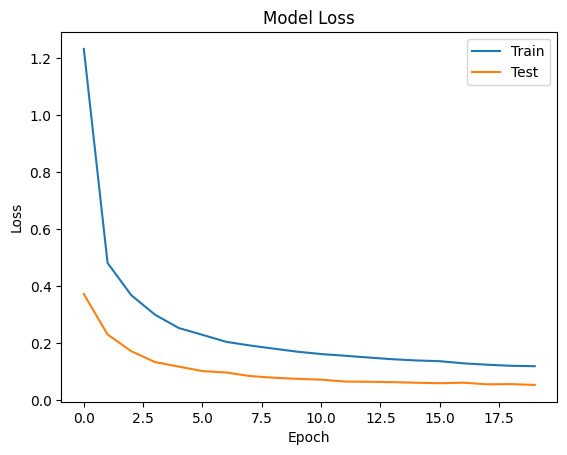

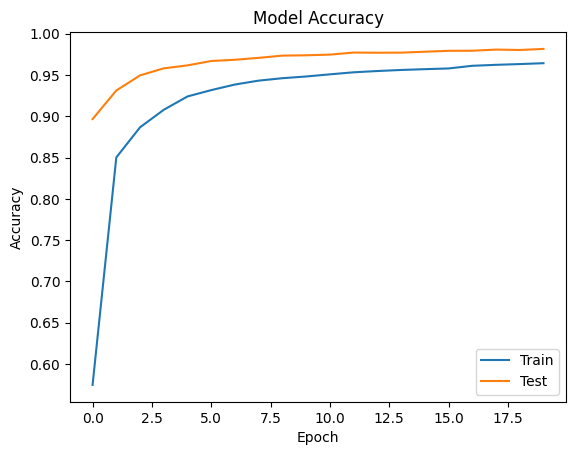

In [11]:
# 학습 과정 시각화 (손실 함수 그래프)

# print(history.history.keys())  # 어떤 값들이 들어있는지 확인용

# Loss 그래프
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

# Accuracy 그래프
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()
